# pH of rainwater (no simplification)

In [1]:
% input constants
KH=10^-1.5; Ka1=10^-6.3; Ka2=10^-10.3; Ka3 =10^-9.74;PCO2=10^-3.5; Kw=10^-14; Ksp = 4.8*10^-9; 
molar_mass = 40.08                                      

molar_mass = 40.080


# equations

$[H_2CO_3] = K_H*PCO_2$

$[HCO_3^-]=\dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]}$

$[CO_3^{2-}] = \dfrac{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}$

$[OH^-]=\dfrac {K_w} {[H^+]}$

# reactions
$[H_2CO_3] = [H^+] + [HCO_3^-]$

$[HCO_3^-] = [H^+] + [CO_3^{2-}]$

$ [H_2O] = [H^+] + [OH^-]$ 

# charge balance
$[H^+] = [HCO_3^-] + 2[CO_3^{2-}] +[OH^-]$

# polynomial

$[H^+] =\dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]} +\dfrac{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}+\dfrac {K_w} {[H^+]} $

# expansion
$[H^+]^3 -[{K_H*P_{CO_2}*K_{a1}-{K_w}}]{[H^+]} - {2K_H*P_{CO_2}*K_{a1}*K_{a2}}= 0  $

# Overall expresssion for the OPEN CaCO3-CO2-H2O System

$[CaCO_3] = Ca^{2+} + CO_3^{2^-}$ 

$ charge balance: 2{Ca^{2+} + CO_3^{2^-}} +[[H^+] = [OH^-] + [HCO_3^-] + 2[CO_3^{2-}]$


$[CO_3^{2-}] = \dfrac{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}$

$[OH^-]=\dfrac {K_w} {[H^+]}$

$[HCO_3^-]=\dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]}$

$ 2[Ca^{2+}] + [H^+] =\dfrac {K_w} {[H^+]} + \dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]} + \dfrac{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}$ 

$[Ca^{2+}] = \dfrac {K_{sp}} {[CO_3^{2-}]}$

$ 2[Ca^{2+}] = 2* \dfrac {K_{sp} [H^+]^2} {K_H*P_{CO_2}*K_{a1}*K_{a2}}$

$ {2* \dfrac {K_{sp} [H^+]^2} {K_H*P_{CO_2}*K_{a1}*K_{a2}}} +[H^+] - {\dfrac {K_w} {[H^+]}} {\dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]}} - {\dfrac{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}} = 0  $

# multiply by H^2
$ {2* \dfrac {K_{sp} [H^+]^4} {K_H*P_{CO_2}*K_{a1}*K_{a2}}} +[H^+]^3 - { {K_w} {[H^+]}} - {{K_H*P_{CO_2}*K_{a1}}{[H^+]}} - {{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}} = 0  $


# Overall expresssion for the OPEN Ca(OH)2-CO2-H2O System
$ [Ca^{2+}] = \dfrac {K_{sp}} {[OH^-]}$

$charge balance: 2[Ca^{2+}] + [H^+] = [OH^-] + [HCO_3^-] + 2[CO_3^{2-}]$





In [2]:
# solve polynomial

a=1;
b=0;
c=-KH*PCO2*Ka1-Kw;
d=-2*KH*PCO2*Ka1*Ka2;

t=roots([a b c d]);
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);
display (pH)

% Simplified approach [H+]=[HCO3-]
Hconc = sqrt(KH*PCO2*Ka1)
pHsimple = -log10(sqrt(KH*PCO2*Ka1));
pHsimplestr=num2str(pHsimple);
display (pHsimple)

pH = 5.6496


Hconc = 2.2387e-06


pHsimple = 5.6500


In [3]:
# solve polynomial for Ca(OH)2 system

In [4]:
# solve polynomial for CaCO3 system

a=2*Ksp/(Ka1*Ka2*KH*PCO2);
b=1;
c=0;
d=-Ka1*KH*PCO2-Kw
e=-2*Ka1*Ka2*KH*PCO2;

t=roots([a b c d e]);
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);
display (pH)
display (t)

d = -5.0219e-12


pH = 8.2910


t = 5.1168e-09


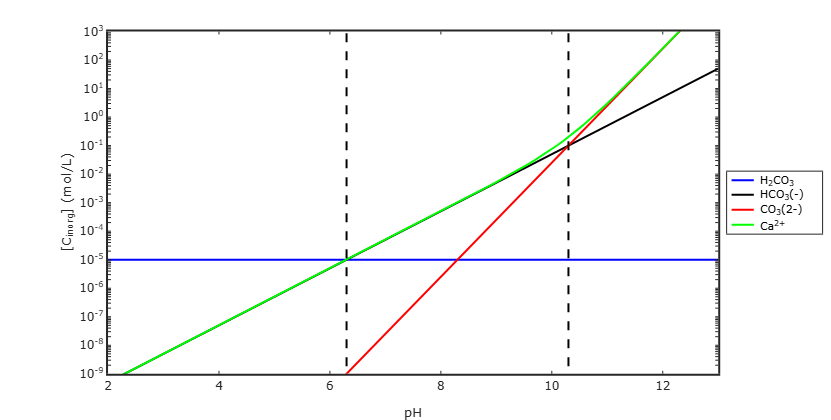

In [5]:
# graphing pH fr CaCO3 system

graphics_toolkit ("plotly");
%graphics_toolkit ("notebook");
pH=2:0.1:13; H=10.^-pH; HCO3=(Ka1*KH*PCO2)./H;  CO3=(Ka2*Ka1*KH*PCO2)./(H.^2); 
H2CO3=ones(size(pH)).*(KH*PCO2); Ca=CO3 + HCO3 + Kw./(H);

h1=semilogy(pH,H2CO3,'b-','linewidth',2);
hold on
h2=semilogy(pH,HCO3,'k-','linewidth',2);
h3=semilogy(pH,CO3,'r-','linewidth',2);
h4=semilogy(pH,Ca,'g-','linewidth',2);
xlabel('pH'); ylabel('[C_{inorg}] (mol/L)')
legend('H_2CO_3','HCO_3(-)','CO_3(2-)','Ca^{2+}','location','eastoutside')
legend ("autoupdate", "off");
set(gca,'linewidth',2,'fontsize',12)

semilogy([-log10(Ka1) -log10(Ka1)],[1e-10 1e3],'k--','linewidth',2)
semilogy([-log10(Ka2) -log10(Ka2)],[1e-10 1e3],'k--','linewidth',2)

axis([2 13 1e-9 1e3])


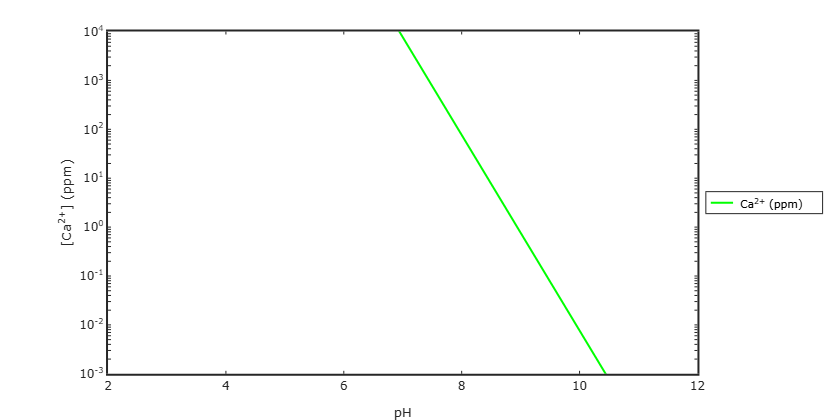

The Ca concentration at pH 12.0 is 0.00 ppm.


In [6]:
% Define constants
graphics_toolkit("plotly");

% Define pH range and compute species concentrations
pH = 2:0.1:12;
H = 10.^-pH;                                
HCO3 = (Ka1 * KH * PCO2) ./ H;              
CO3 = (Ka2 * Ka1 * KH * PCO2) ./ (H.^2);    

% Compute [Ca2+] in mol/L
Ca = Ksp ./ CO3; % Solubility equilibrium

% Convert [Ca2+] to ppm
Ca_ppm = Ca * molar_mass * 1000; % Convert from mol/L to ppm

% Plot Ca (ppm) vs. pH
figure;
h4 = semilogy(pH, Ca_ppm, 'g-', 'linewidth', 2);
xlabel('pH'); ylabel('[Ca^{2+}] (ppm)')
legend('Ca^{2+} (ppm)','location','eastoutside');
legend("autoupdate", "off");
set(gca, 'linewidth', 2, 'fontsize', 12);
axis([2 12 1e-3 1e4]); % Adjusted y-axis for ppm scale

% Find the Ca concentration at pH = 12
pH_target = 12;                        
[~, idx] = min(abs(pH - pH_target));   % Find closest pH index
Ca_target_ppm = Ca_ppm(idx);                   

% Display results
fprintf('The Ca concentration at pH %.1f is %.2f ppm.\n', pH_target, Ca_target_ppm);


Execution exception: graphics_toolkit: qt toolkit is not available

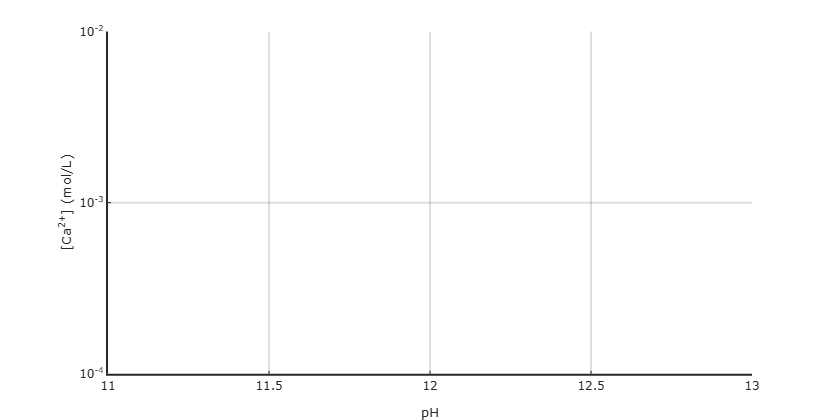

In [9]:
% Define constants
graphics_toolkit("qt"); % Use 'qt' for better compatibility in Octave, 'plotly' if using MATLAB

% Experimental data for Ca²⁺ vs. pH
exp_pH = [12.31 12.55 12.54 12.51 12.45 12.24 12.17 12.16 12.16 12.17 12.19]; % pH values
exp_Ca = [4.41e-3 5.98e-3 6.77e-3 7e-3 6.77e-3 6.84e-3 6.89e-3 6.98e-3 7.07e-3 7.46e-3 7.24e-3]; % Ca²⁺ concentration (mol/L)

% Create a new figure
figure;
hold on; % Ensure plots remain visible

% Scatter plot of experimental data
scatter(exp_pH, exp_Ca, 90, 'bo', 'filled'); % Blue circles for experimental data

% Labels and Formatting
xlabel('pH'); 
ylabel('[Ca^{2+}] (mol/L)');
title('Experimental Ca^{2+} Concentration vs. pH');

% Ensure log scale is correctly applied
set(gca, 'YScale', 'log', 'XScale', 'linear', 'linewidth', 2, 'fontsize', 12);

% Adjust axis limits to ensure visibility of data points
xlim([11 13]);  % pH range
ylim([1e-4 1e-2]); % Widened y-axis to ensure points are visible

% Enable grid for better readability
grid on;
hold off;


In [8]:
# solve polynomial for Ca

a=2*Ksp/(Ka1*Ka2*KH*PCO2);
b=1;
c=0;
d=-Kw-2Ka1*KH*PCO2
e=-2*Ka1*Ka2*KH*PCO2;

t=roots([a b c d e]);
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);
display (pH)


Execution exception: parse error:

  syntax error




Execution exception: parse error:

  syntax error




ans = 1.0000e-05


pH = 8.2910
